<a href="https://colab.research.google.com/github/ChrisMath26/Bases_ML/blob/main/Red%20neuronal/Christian_Trilleras_NeuralNet_con_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Evolución de la función de perdida en función de las epocas

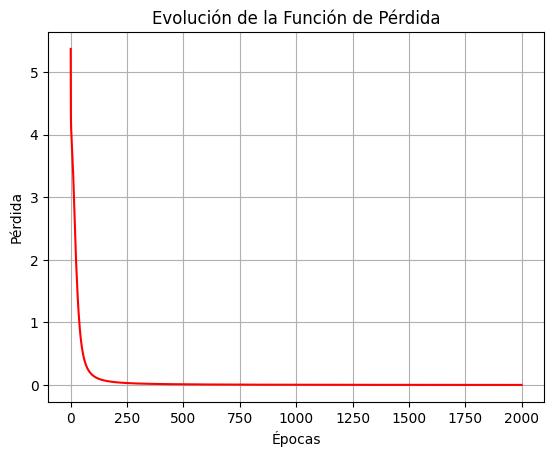

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Definimos la función de activación ReLU
def relu(x):
  return np.maximum(0,x)
  raise Exception("Debe Implementar la funcion de activación ReLu")

# Definimos la función de activación softmax
def softmax(x):
    exp_x = np.exp(x)
    sumatoria = np.sum(exp_x, axis =1, keepdims= True)
    return exp_x / sumatoria
    raise Exception("Debe Implementar la funcion de activación Softmax")

# Definimos los datos de entrada y salida para la red
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[1,0,0],[0,1,0],[0,0,1],[1,0,0]])

# Definimos los hiperparámetros para la red
epochs = 2000 # Número de iteraciones de entrenamiento
eta= 0.1 #Tasa de aprendizaje para la actualización de pesos.

#Tamaños de las diferentes capas de la red
capa_de_entrada = 2
capa_oculta = 4
capa_salida = 3

#Pesos y Bias
W_1 = np.random.uniform(size=(capa_de_entrada, capa_oculta ))
W_2 = np.random.uniform(size=(capa_oculta, capa_salida))
b_1 = np.random.uniform(size=(1, capa_oculta))
b_2 = np.random.uniform(size=(1, capa_salida))

# Entrenamos la red neuronal
error=np.zeros(epochs)
for i in range(epochs):


    # Forward pass
    A_1=X
    Z_2=A_1@W_1+b_1
    A_2=relu(Z_2)
    Z_3=A_2@W_2+b_2
    y_hat=softmax(Z_3)

    # Calculo del error
    error[i]=-np.sum(y*np.log(y_hat))

    # Backpropagation
    delta=y_hat-y   #df/dz
    d_w2=A_2.T@delta
    d_b2=np.sum(delta,axis=0)

    delta2=delta@W_2.T*(Z_2>0) # (z2 > 0) aplica la derivada de la función ReLU (1 si z2 es mayor que 0, de lo contrario 0).
    d_w1=A_1.T@delta2
    d_b1=np.sum(delta2,axis=0)

    # Actualizamos los pesos con la dirección del gradiente descendiente
    W_2-=eta*d_w2
    b_2-=eta*d_b2
    W_1-=eta*d_w1
    b_1-=eta*d_b1
# Graficamos la evolución de la función de pérdida
plt.plot(np.arange(epochs), error, color = 'red')
plt.title("Evolución de la Función de Pérdida")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.grid(True)
plt.show()

In [ ]:
nueva_entrada = np.array([[0,1]])
Z_2 = nueva_entrada@W_1 + b_1
A_2 = relu(Z_2)
Z_3 = A_2@W_2 + b_2
salida = softmax(Z_3)
print(salida)

[[4.06891598e-04 9.99593108e-01 4.55229041e-15]]
